In [14]:
%matplotlib notebook

# Уравнение переноса

Введите целые числа:
m = 50
n = 50


<IPython.core.display.Javascript object>


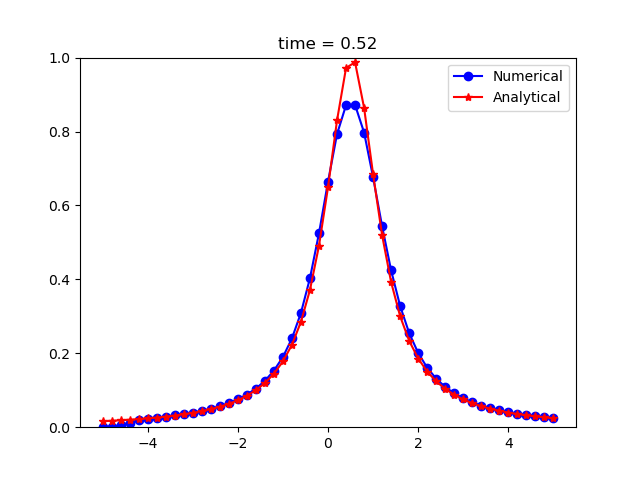

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Параметры задачи
def u0(x):
    return 1.0 / (1 + 2 * x * x)

C = 1.0
T = 2.0
L, R = -5.0, 5.0


# Параметры метода
print('Введите целые числа:')
print('n = ', end='')
n = int(input())
print('m = ', end='')
m = int(input())

h = (R-L) / n
tau = T / m


# Сетки
x = np.linspace(L, R, n+1)
t = np.linspace(0.0, T, m+1)
y = np.zeros((m+1, n+1))


# Метод
d = C * tau / h
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n+1):
        y[k+1][i] = y[k][i] - d * (y[k][i] - y[k][i-1])



# Точное решение
def solution(x, t):
    return u0(x - C*t)

vsolution = np.vectorize(solution, excluded='t')
u = np.zeros((m+1, n+1))
for k in range(m):
    u[k] = vsolution(x, tau*k)


def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title("time = " + str(tau*k))
    plt.plot(x, y[k], 'bo-', label='Numerical')
    plt.plot(x, u[k], 'r*-', label='Analytical')
    plt.legend()


ani = animation.FuncAnimation(plt.figure(0), animate, frames=y.shape[0], interval=100)
#ani.save('transfer.gif')
plt.show()


# Уравнение теплопроводности

Введите целые числа:
m = 50
n = 70


<IPython.core.display.Javascript object>


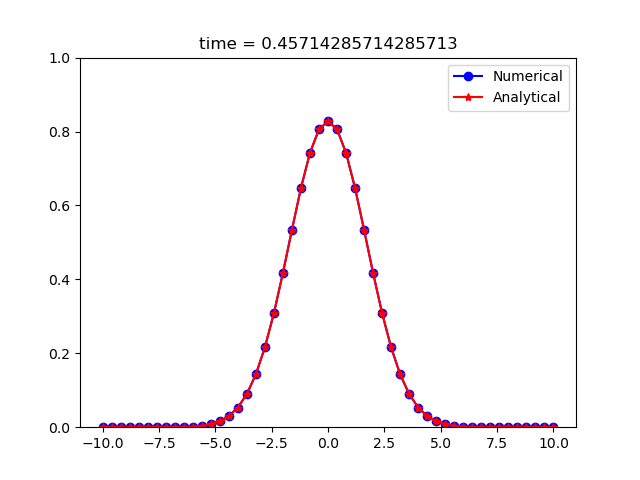

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Параметры задачи
def u0(x):
    return np.exp(-x*x/4)

mu = 1.0
T = 2.0
L, R = -10.0, 10.0


# Параметры метода
print('Введите целые числа:')
print('n = ', end='')
n = int(input())
print('m = ', end='')
m = int(input())

h = (R - L) / n
tau = T / m


# Сетки
x = np.linspace(L, R, n+1)
t = np.linspace(0.0, T, m+1)
y = np.zeros((m+1, n+1))


# Метод
d = mu * tau / (h * h)
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n):
        y[k+1][i] = y[k][i] + d * (y[k][i-1] - 2 * y[k][i] + y[k][i+1])


# Точное решение
def solution(x, t):
    return 1 / np.sqrt(t + 1) * np.exp(-x * x / (4 * (t + 1)))


vsolution = np.vectorize(solution, excluded=['t'])
u = np.zeros((m+1, n+1))
for k in range(m):
    u[k] = vsolution(x, tau*k)



def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title("time = " + str(tau*k))
    plt.plot(x, y[k], 'bo-', label='Numerical')
    plt.plot(x, u[k], 'r*-', label='Analytical')
    plt.legend()


ani = animation.FuncAnimation(plt.figure(0), animate, frames=y.shape[0], interval=100)
#ani.save('thermal.gif', 'animation.writer')
plt.show()
